# **🚀 Air Quality Index (AQI) Prediction Model**

**Author** - _Prashant Kumar_

## 📌 1. Introduction
Air pollution has become a serious environmental concern, and predicting the Air Quality Index (AQI) can help in mitigating its impact. In this project, we will develop a machine learning model to predict AQI using historical air quality data.


## 📌 2. Dataset
**🗂 Path:** `C:/Users/prash/Downloads/air quality data.csv`

The dataset contains various pollutant levels along with AQI values. Our goal is to analyze the data, preprocess it, and build a predictive model.


## ✅ 3. Steps in the Project

### 💡 3.1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 📌 3.2 Loading & Evaluation of the Dataset

#### 🔹 3.2.1 Loading of Dataset

In [2]:
df = pd.read_csv("C:/Users/prash/Downloads/air quality data.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


#### 🔹 3.2.2 Evaluation of the Data

In [3]:
# Shape - rows & Columns
df.shape

(29531, 16)

In [4]:
# information
df.info

<bound method DataFrame.info of                 City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Be

In [5]:
# To know the Duplicate values
df.duplicated().sum()


np.int64(0)

In [6]:
# To check Missing Values
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [7]:
# Summary of Statistics in the Dataset
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [8]:
# Summary of Statistics in the Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,67.450578,64.661449,0.04,28.820,48.57,80.5900,949.99
PM10,18391.0,118.127103,90.605110,0.01,56.255,95.68,149.7450,1000.00
NO,25949.0,17.574730,22.785846,0.02,5.630,9.89,19.9500,390.68
NO2,25946.0,28.560659,24.474746,0.01,11.750,21.69,37.6200,362.21
NOx,25346.0,32.309123,31.646011,0.00,12.820,23.52,40.1275,467.63
NH3,19203.0,23.483476,25.684275,0.01,8.580,15.85,30.0200,352.89
CO,27472.0,2.248598,6.962884,0.00,0.510,0.89,1.4500,175.81
SO2,25677.0,14.531977,18.133775,0.01,5.670,9.16,15.2200,193.86
O3,25509.0,34.491430,21.694928,0.01,18.860,30.84,45.5700,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.0800,455.03


In [9]:
# Percentage (%) of the Null Values
null_values_percentage = (df.isnull().sum() / df.shape[0]) * 100
null_values_percentage = null_values_percentage.sort_values(ascending=False)
null_values_percentage


Xylene        61.322001
PM10          37.723071
NH3           34.973418
Toluene       27.229014
Benzene       19.041008
AQI           15.851139
AQI_Bucket    15.851139
PM2.5         15.570079
NOx           14.171549
O3            13.619586
SO2           13.050692
NO2           12.139785
NO            12.129626
CO             6.972334
Date           0.000000
City           0.000000
dtype: float64

**Key Considerations:**
- Xylene has the highest percentage of missing values - 61.86%
- PM10 and NH3 28 - 26 %

*Week 2 - Visualization*

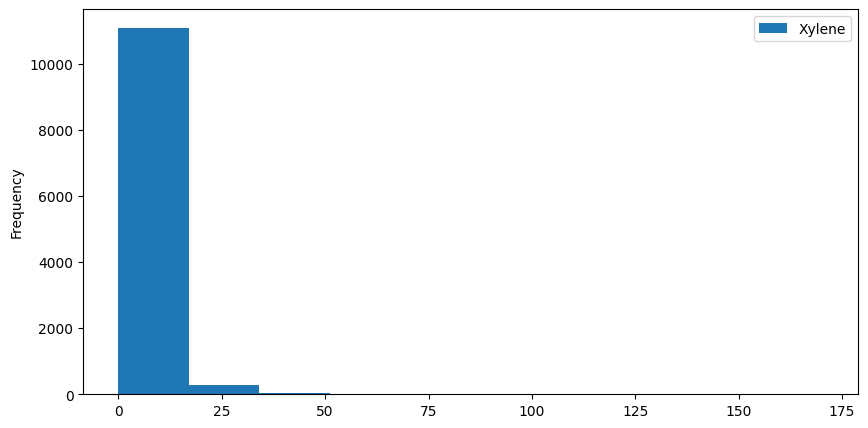

In [10]:
# Univariate analysis
df['Xylene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

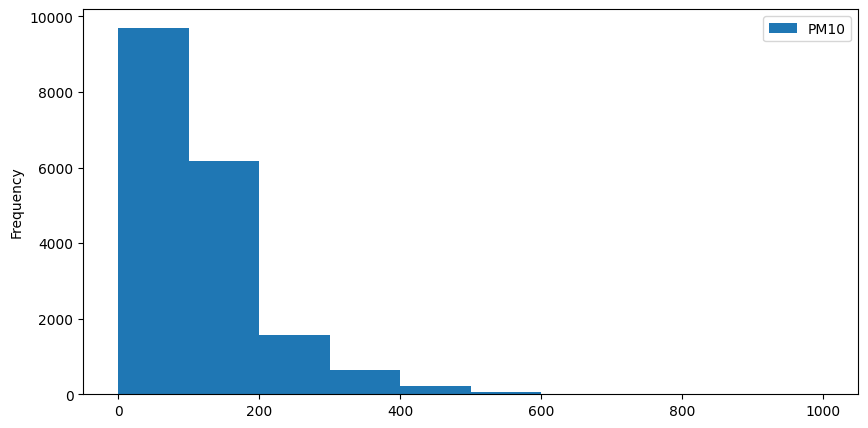

In [11]:
df['PM10'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

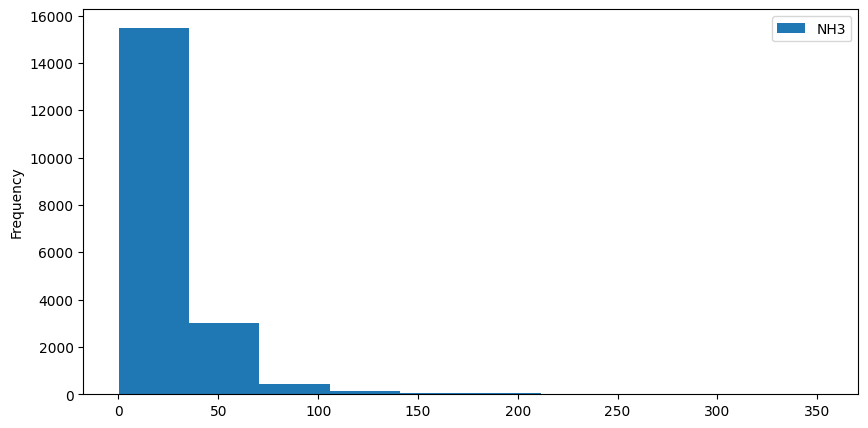

In [12]:
df['NH3'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

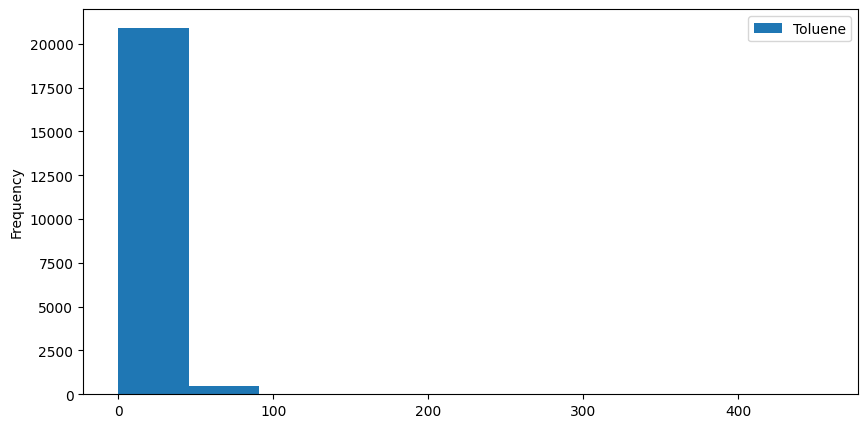

In [13]:
df['Toluene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

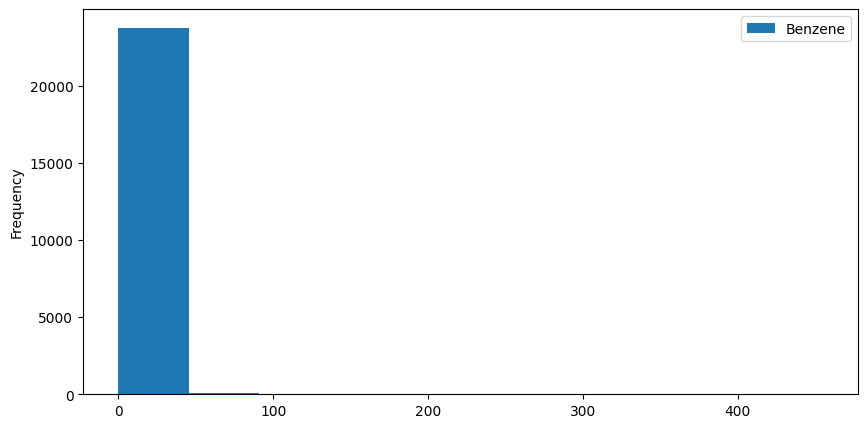

In [14]:
df['Benzene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

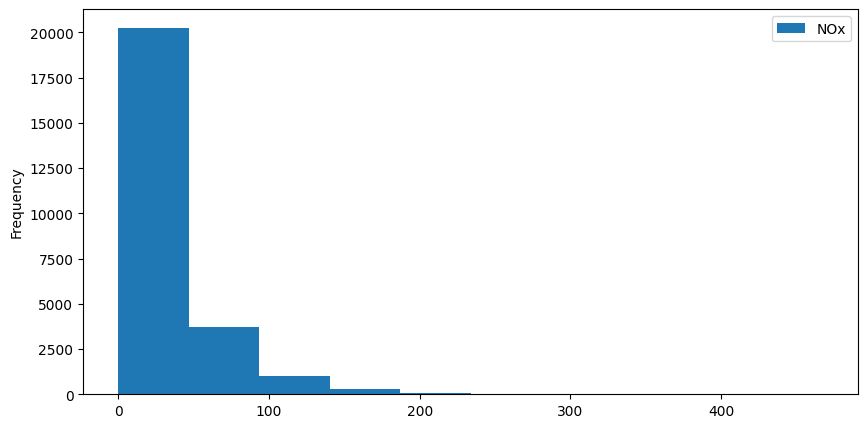

In [15]:
df['NOx'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

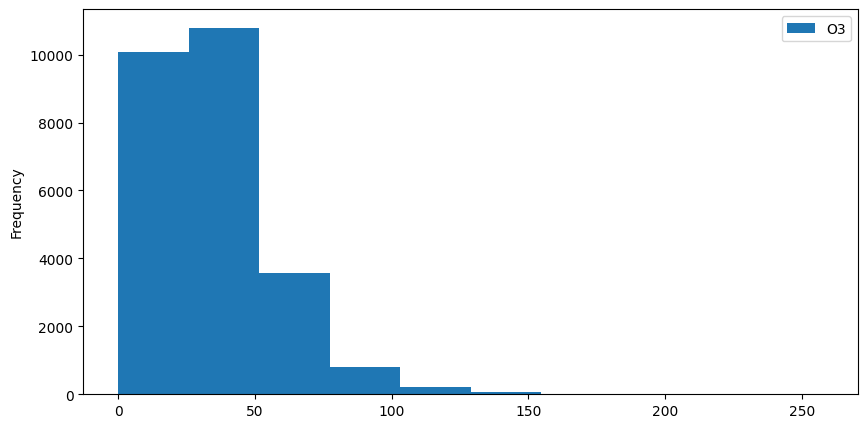

In [16]:
df['O3'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

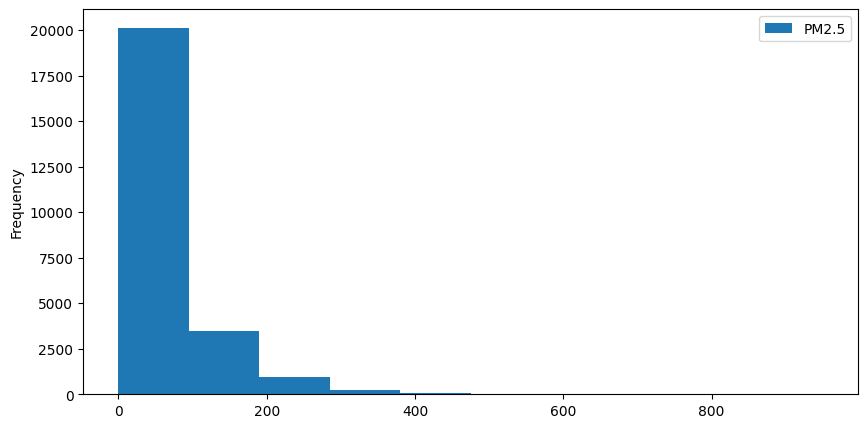

In [17]:
df['PM2.5'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

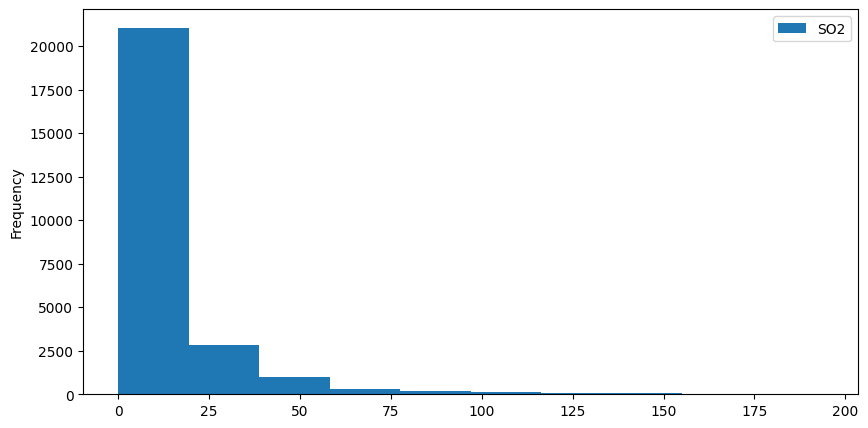

In [18]:
df['SO2'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

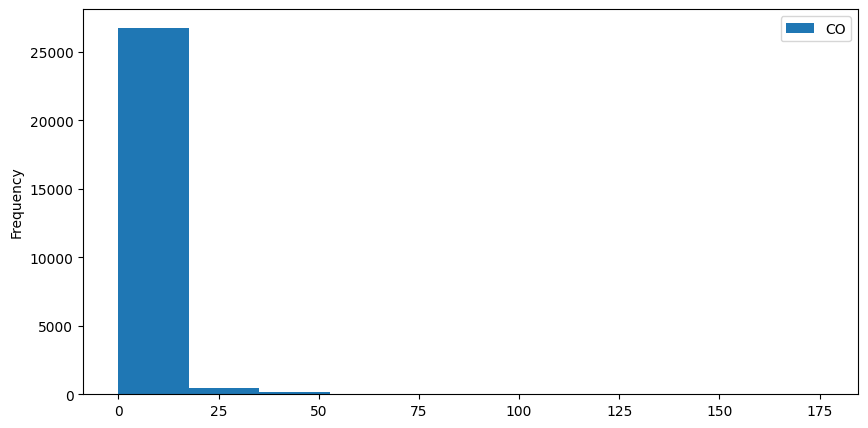

In [19]:
df['CO'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

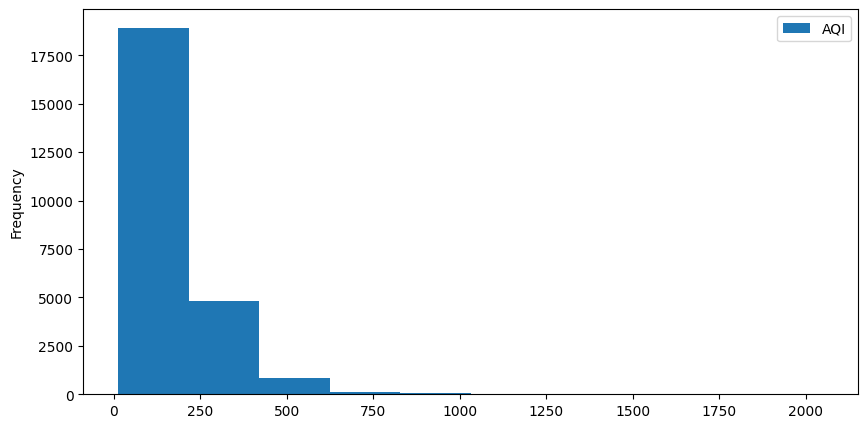

In [20]:
df['AQI'].plot(kind = 'hist', figsize=(10,5))
plt.legend()
plt.show()

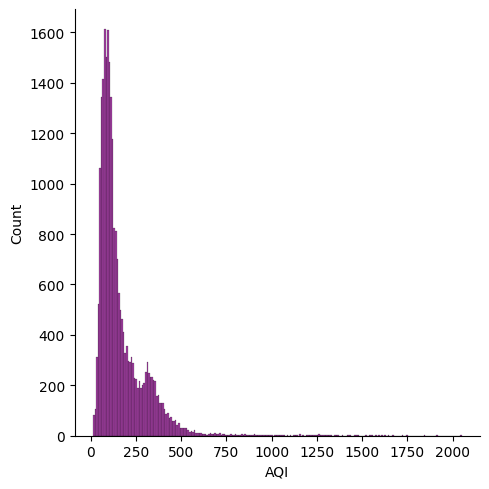

In [21]:
# Distribution of AQi from 2015 to 2020
sns.displot(df, x='AQI', color='purple')
plt.show()

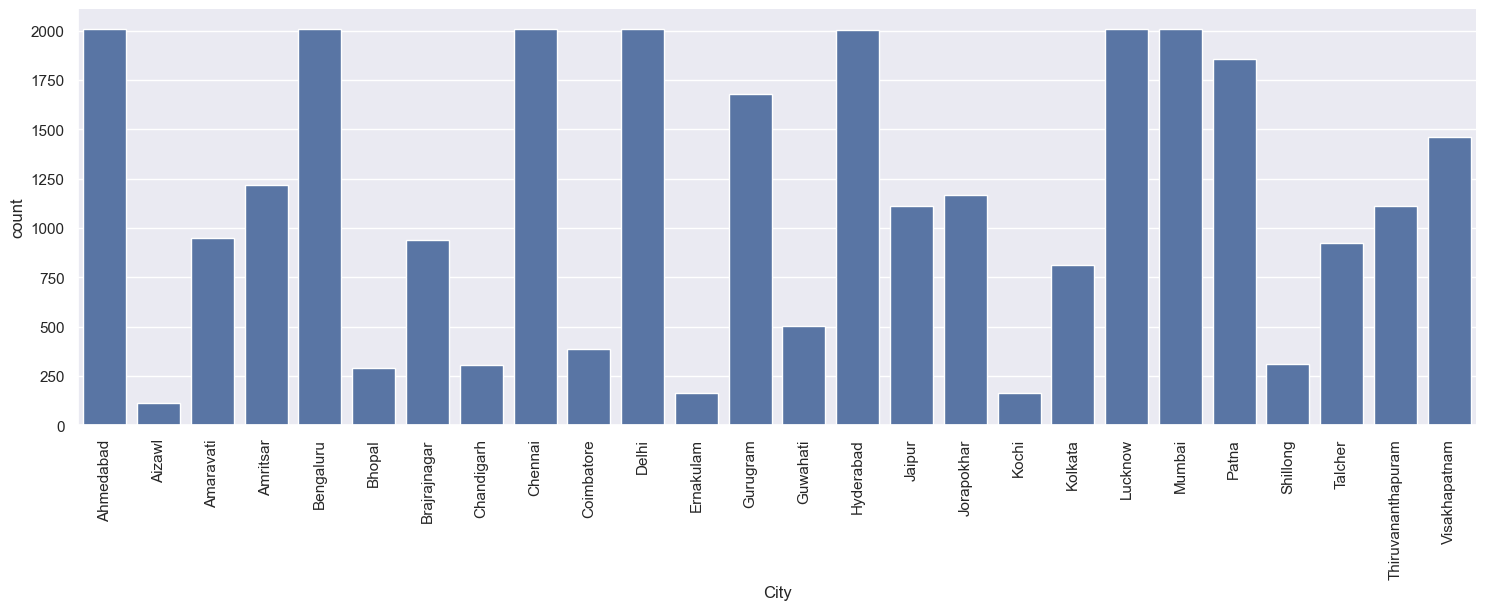

In [22]:
# Bivariate
sns.set_theme(style="darkgrid")
graph = sns.catplot(x="City", kind='count', data=df, height=5, aspect=3)
graph.set_xticklabels(rotation=90)

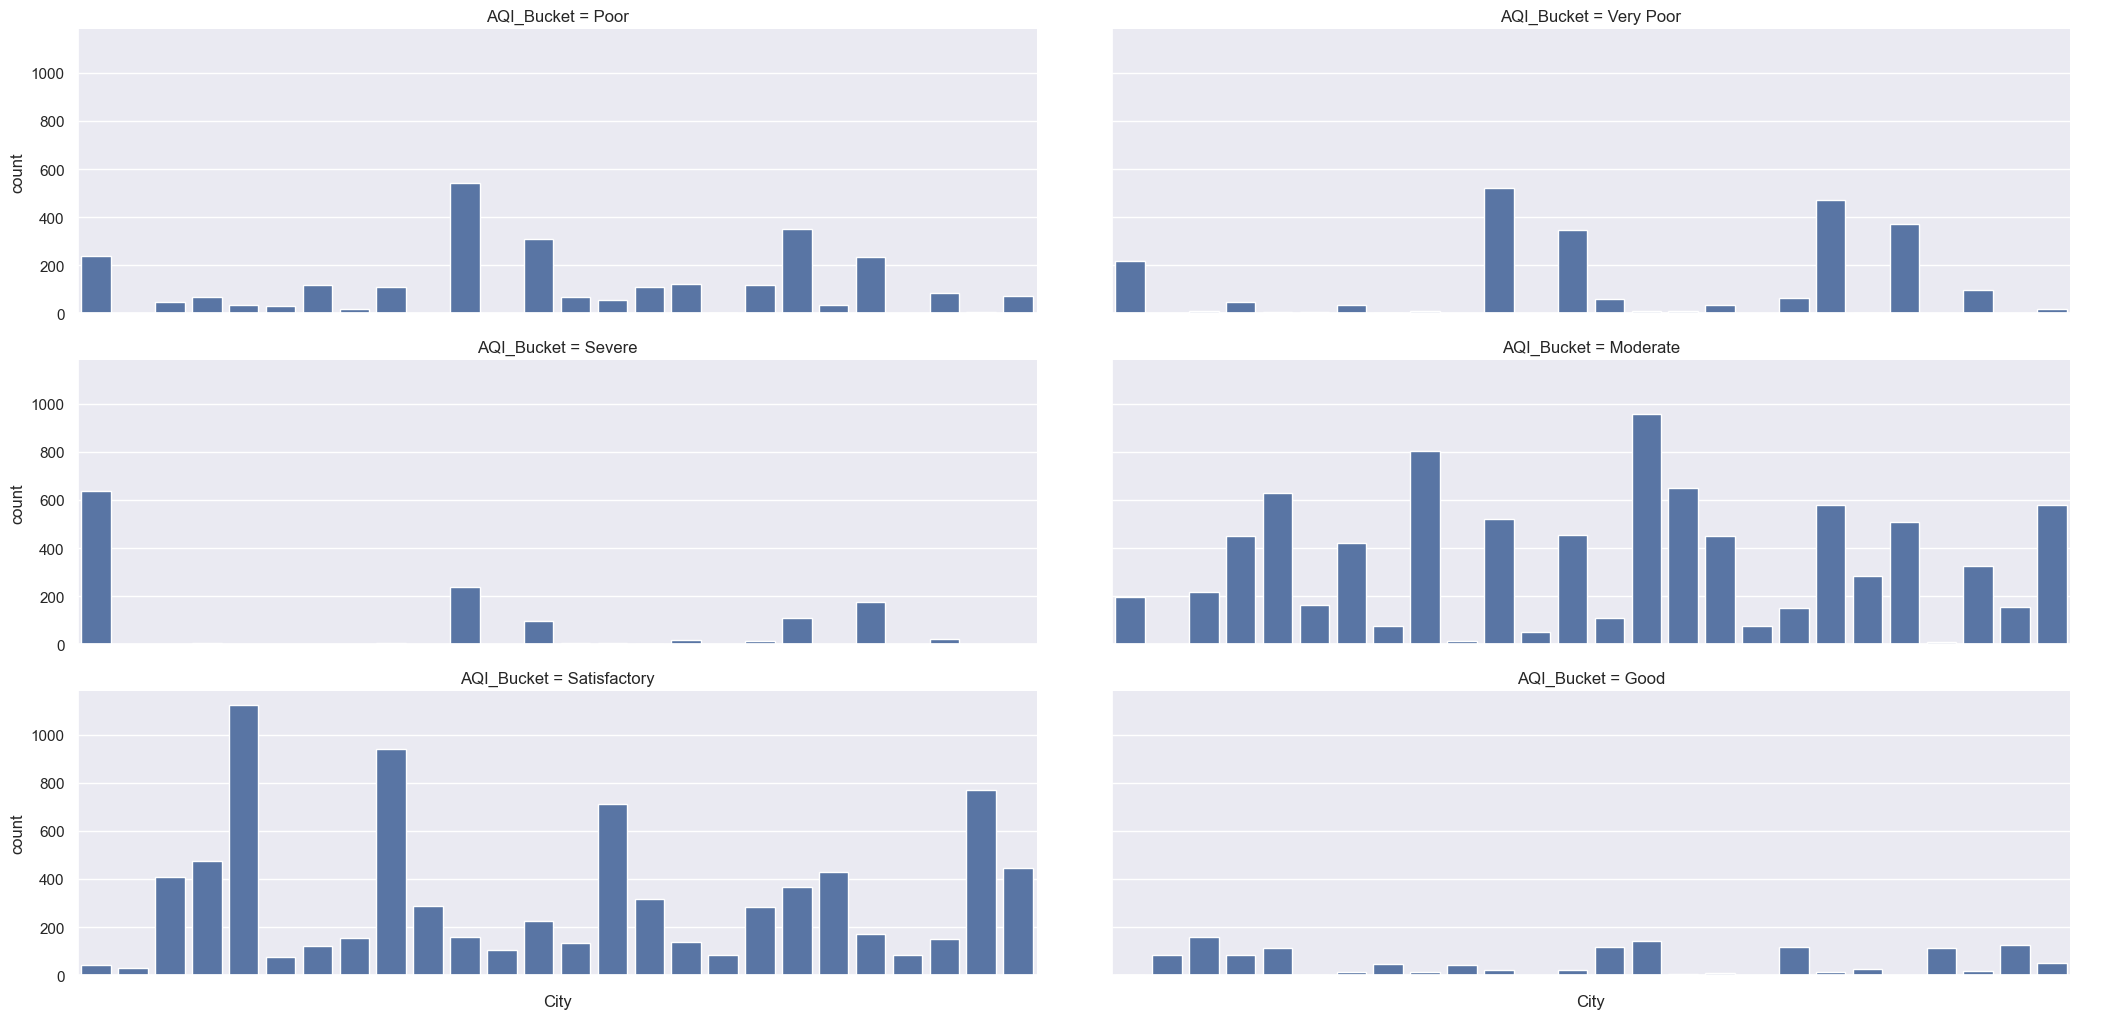

In [23]:
sns.set_theme(style="darkgrid")
graph = sns.catplot(x="City", kind='count', data=df, col="AQI_Bucket", col_wrap=2, 
                    height=3.5, aspect=3)
graph.set_xticklabels(rotation=90)

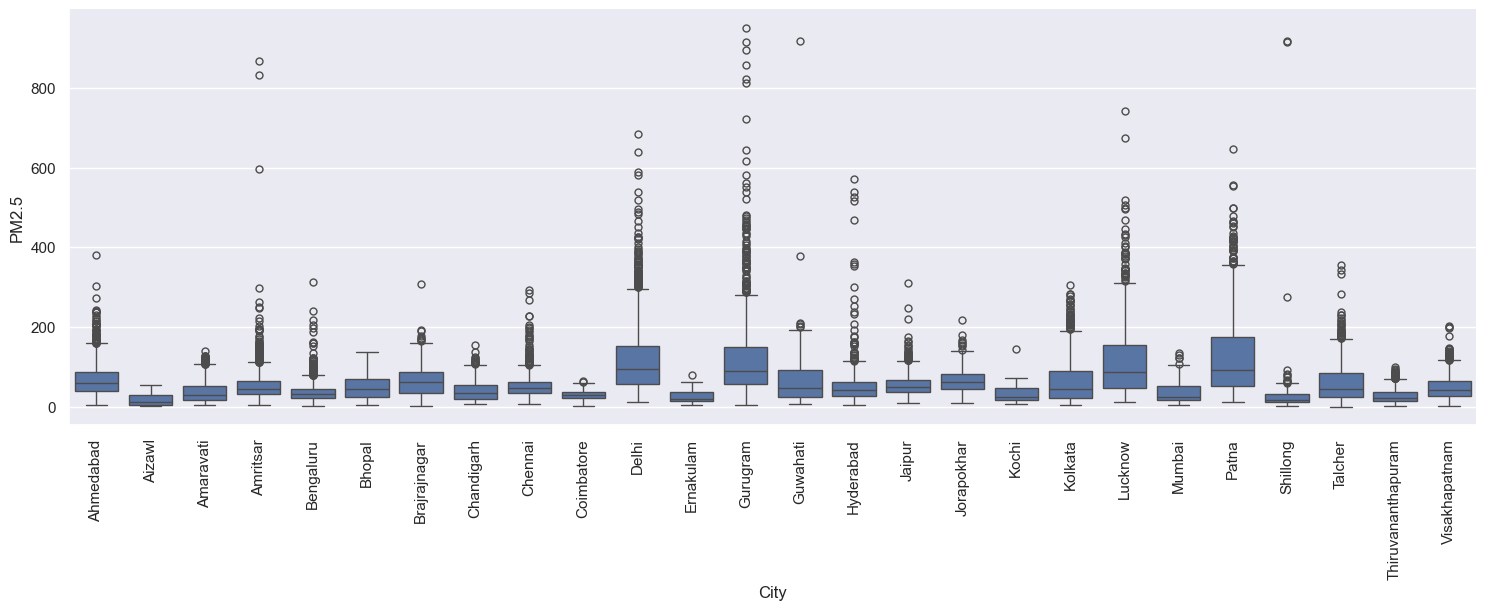

In [24]:
graph1 = sns.catplot(x='City', y='PM2.5', kind='box', data=df, height=5, aspect=3)
graph1.set_xticklabels(rotation=90)

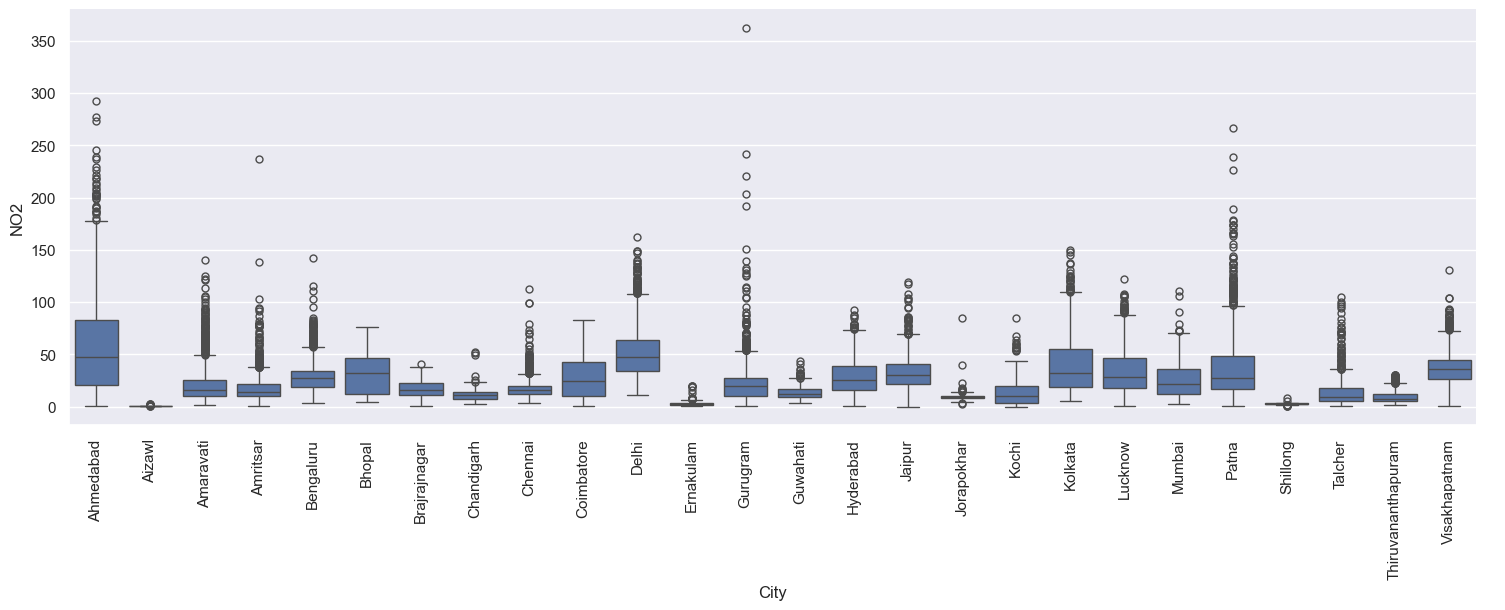

In [25]:
graph2 = sns.catplot(x='City', y='NO2', kind='box', data=df, height=5, aspect=3)
graph2.set_xticklabels(rotation=90)

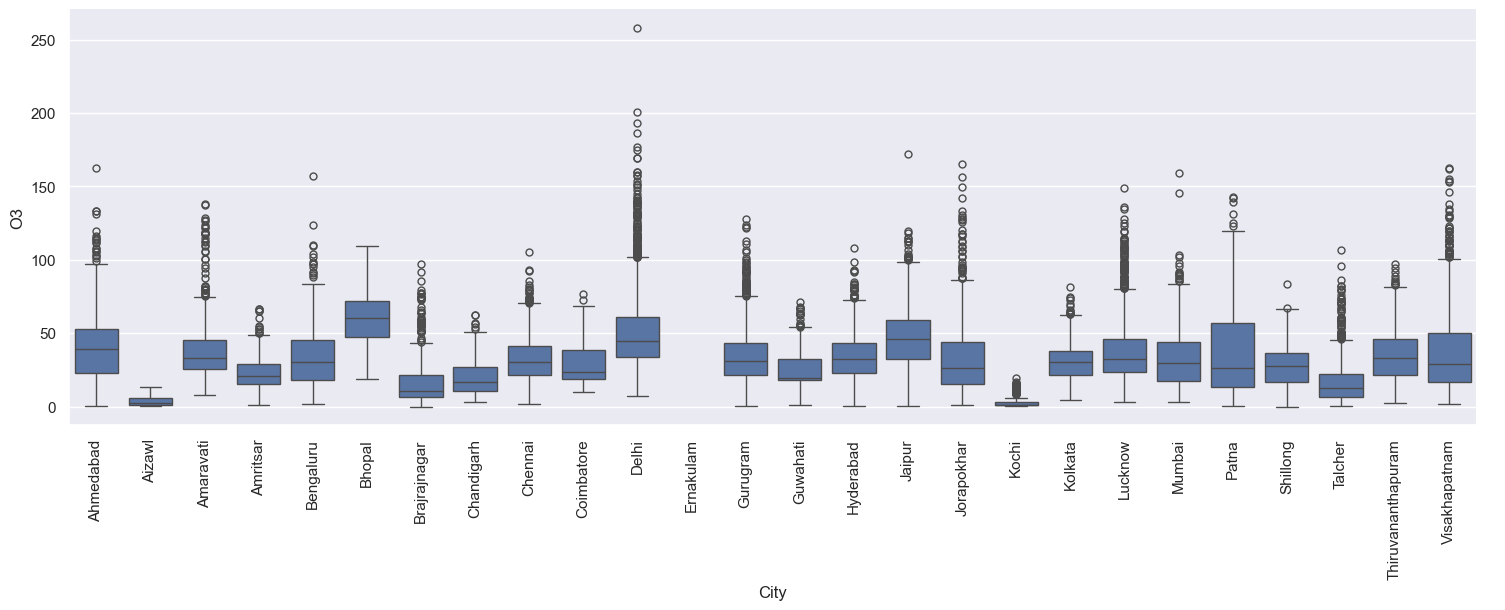

In [26]:
graph3 = sns.catplot(x='City', y='O3', kind='box', data=df, height=5, aspect=3)
graph3.set_xticklabels(rotation=90)

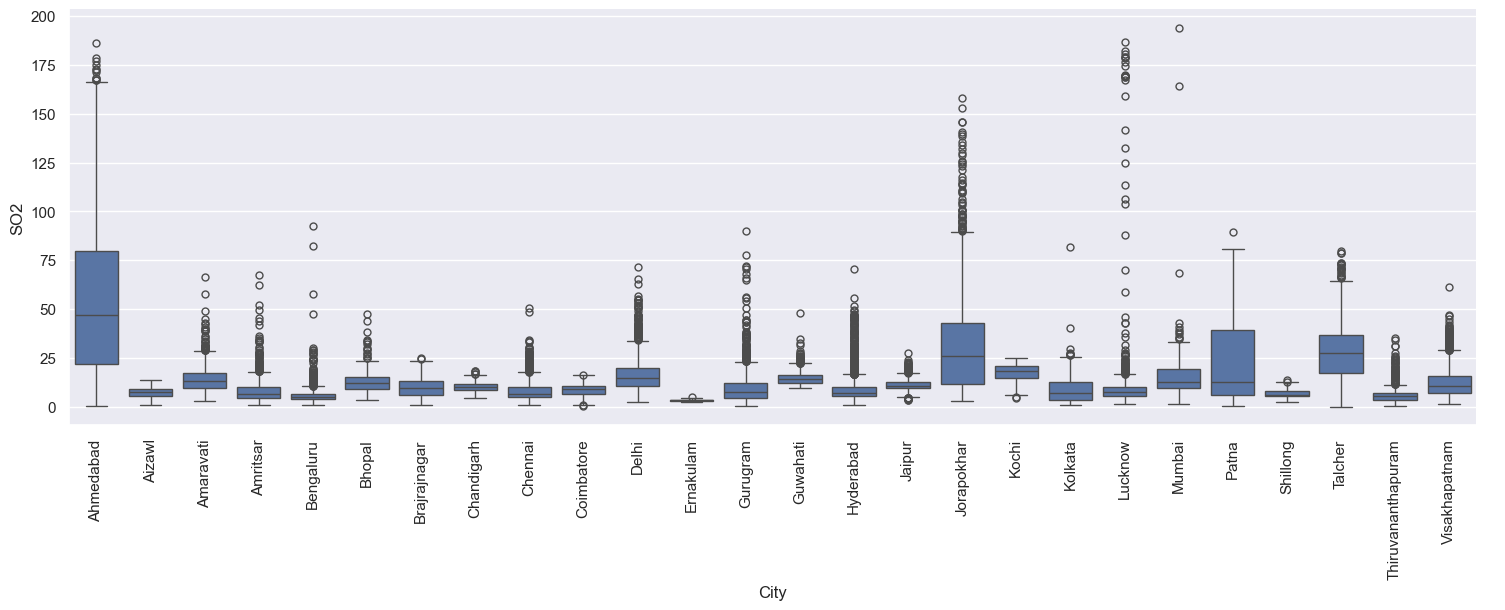

In [27]:
graph4 = sns.catplot(x='City', y='SO2', kind='box', data=df, height=5, aspect=3)
graph4.set_xticklabels(rotation=90)

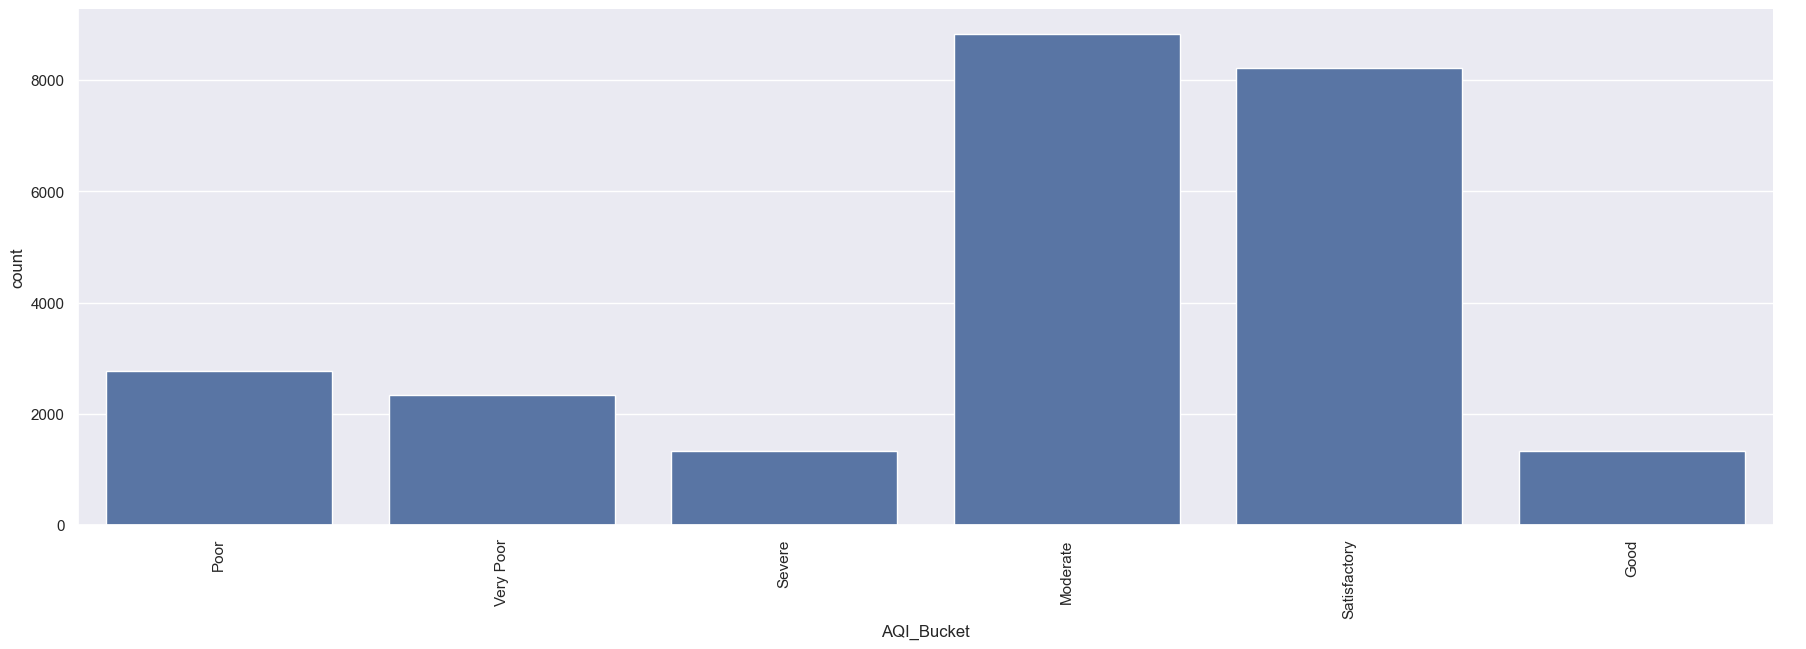

In [28]:
graph5 = sns.catplot(x='AQI_Bucket', data=df, kind='count', height=6, aspect=3)
graph5.set_xticklabels(rotation=90)

In [29]:
# TO check the null values
df.isnull().sum().sort_values(ascending=False)

Xylene        18109
PM10          11140
NH3           10328
Toluene        8041
Benzene        5623
AQI            4681
AQI_Bucket     4681
PM2.5          4598
NOx            4185
O3             4022
SO2            3854
NO2            3585
NO             3582
CO             2059
Date              0
City              0
dtype: int64

In [30]:
df.describe().loc['mean']

PM2.5       67.450578
PM10       118.127103
NO          17.574730
NO2         28.560659
NOx         32.309123
NH3         23.483476
CO           2.248598
SO2         14.531977
O3          34.491430
Benzene      3.280840
Toluene      8.700972
Xylene       3.070128
AQI        166.463581
Name: mean, dtype: float64

In [31]:
df = df.replace({
    "PM2.5":{np.nan:67.476613},
    "PM10":{np.nan:118.454435},
    "NO": {np.nan:17.622421},
    "NO2": {np.nan:28.978391},
    "NOx": {np.nan:32.289012},
    "NH3": {np.nan:23.848366},
    "CO":  {np.nan:2.345267},
    "SO2": {np.nan:34.912885},
    "O3": {np.nan:38.320547},
    "Benzene": {np.nan:3.458668},
    "Toluene": {np.nan:9.525714},
    "Xylene": {np.nan:3.588683}
})

In [32]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI           4681
AQI_Bucket    4681
dtype: int64

In [33]:
df = df.drop(['AQI_Bucket'], axis=1)

In [34]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,67.476613,118.454435,0.92,18.22,17.15,23.848366,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,Ahmedabad,2015-01-02,67.476613,118.454435,0.97,15.69,16.46,23.848366,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,Ahmedabad,2015-01-03,67.476613,118.454435,17.40,19.30,29.70,23.848366,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,Ahmedabad,2015-01-04,67.476613,118.454435,1.70,18.48,17.97,23.848366,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,Ahmedabad,2015-01-05,67.476613,118.454435,22.10,21.42,37.76,23.848366,22.10,39.33,39.31,7.01,18.89,2.78,NaN


<Axes: >

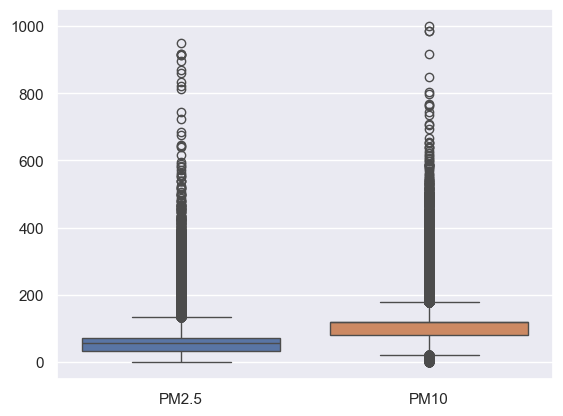

In [35]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

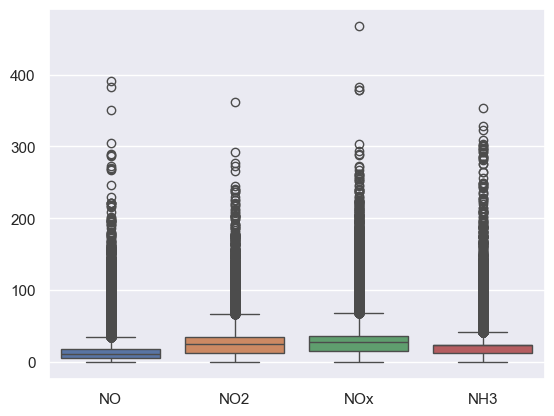

In [36]:
sns.boxplot(data=df[['NO', 'NO2', 'NOx', 'NH3']])

<Axes: >

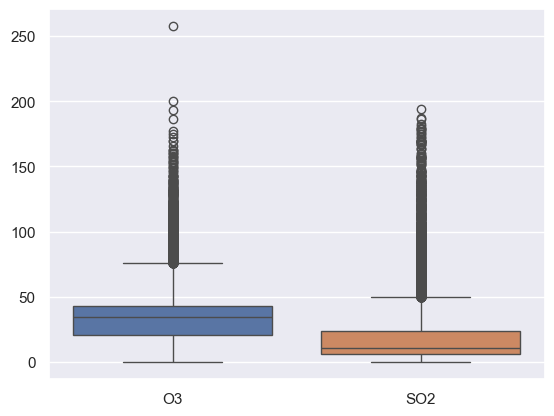

In [37]:
sns.boxplot(data=df[['O3', 'SO2']])

In [38]:
# IQR Method - Q3 Q1
def replace_outliers(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lb = Q1 - 1.5 * IQR
        ub = Q3 + 1.5 * IQR
        df[column] = df[column].apply(
            lambda x: Q1 if x < lb else (Q3 if x > ub else x)
        )
    return df

In [39]:
df = replace_outliers(df)

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,29531.0,54.528579,26.614548,0.04,32.1500,58.030000,72.450000,132.89
PM10,29531.0,102.182854,32.745502,20.65,79.3175,118.454435,118.454435,177.16
NO,29531.0,12.410174,7.474268,0.02,6.2100,11.530000,17.622421,34.73
NO2,29531.0,25.099318,14.344193,0.01,12.9800,25.240000,34.662500,67.18
NOx,29531.0,26.098338,14.718195,0.00,14.6700,27.550000,36.012500,68.02
NH3,29531.0,19.473354,8.733465,0.01,12.0400,23.848366,23.848366,41.56
CO,29531.0,1.092829,0.745766,0.00,0.5400,0.950000,1.710000,3.46
SO2,29531.0,14.982196,11.530100,0.01,6.0900,10.480000,23.470000,49.53
O3,29531.0,32.921258,15.727162,0.01,20.7400,34.780000,42.730000,75.71
Benzene,29531.0,2.067875,1.830508,0.00,0.2400,1.840000,3.458668,8.28


<Axes: >

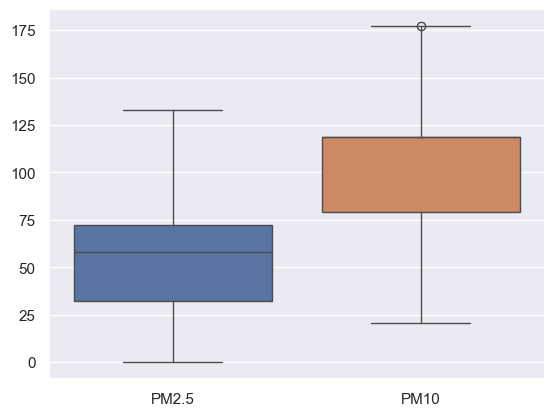

In [41]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

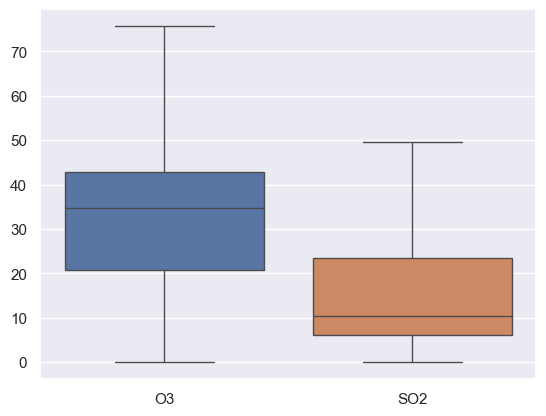

In [42]:
sns.boxplot(data=df[['O3', 'SO2']])

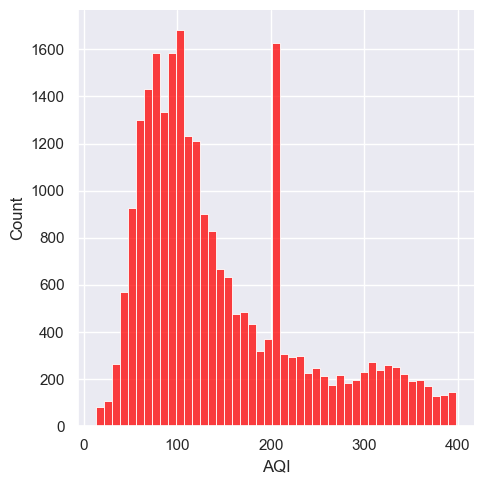

In [43]:
sns.displot(df, x='AQI', color='red')
plt.show()

In [44]:
df1 = df.drop(columns=['City'])

PM10       37.336368
PM2.5      19.924078
O3         12.029026
NO2         9.170985
NH3         7.115326
SO2         5.474312
NO          4.534526
Toluene     2.229333
Xylene      1.031164
Benzene     0.755576
CO          0.399306
dtype: float64


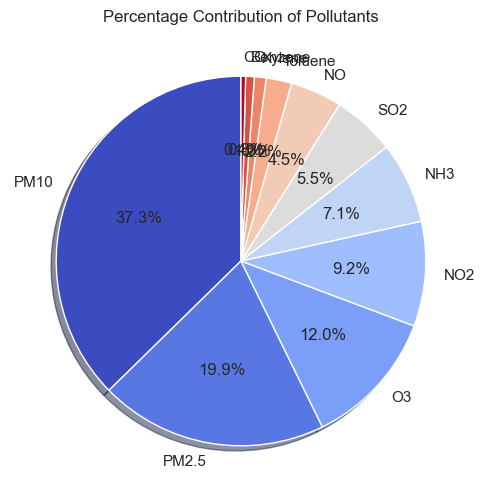

In [45]:
# Summing up all pollutant columns
pollutant_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']  # Modify based on actual column names in your dataset

# Calculating the total pollution sum
total_pollution = df[pollutant_columns].sum().sum()

# Calculating the percentage contribution of each pollutant
pollution_percentage = (df[pollutant_columns].sum() / total_pollution) * 100

# Displaying the results
pollution_percentage = pollution_percentage.sort_values(ascending=False)
print(pollution_percentage)

# 📊 Visualizing the pollution contribution using a pie chart
plt.figure(figsize=(10,6))
pollution_percentage.plot(kind='pie', autopct='%1.1f%%', cmap='coolwarm', startangle=90, shadow=True)
plt.title("Percentage Contribution of Pollutants")
plt.ylabel('')  # Hide the y-label
plt.show()


### 💡 3.3 Data Preprocessing
🔹 Handling missing values

🔹 Removing duplicates

🔹 Converting categorical values if any

In [46]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

### 📊 3.4 Exploratory Data Analysis (EDA)

#### 💡 Understanding Air Pollutants

- **PM2.5 and PM10**  
  - **PM2.5**: Particulate matter with a diameter of 2.5 micrometers or less, considered "fine particulate matter" and can penetrate deep into the lungs.  
  - **PM10**: Particulate matter with a diameter of 10 micrometers or less, considered "inhalable particulate matter".  

- **Nitrogen Oxides (NO and NO2)**  
  - **NO (Nitric Oxide)**: A gas formed during combustion processes.  
  - **NO2 (Nitrogen Dioxide)**: A more harmful pollutant formed when NO reacts with oxygen in the atmosphere.  

- **Other pollutants**  
  - **NH3 (Ammonia)**: A colorless gas with a pungent odor, often emitted from agricultural activities.  
  - **CO (Carbon Monoxide)**: A colorless, odorless gas mainly produced by incomplete combustion of fossil fuels.  
  - **SO2 (Sulfur Dioxide)**: A gas with a strong odor, primarily from burning fossil fuels containing sulfur.  
  - **O3 (Ozone)**: A secondary pollutant formed by the reaction of sunlight with other chemicals in the atmosphere.  
  - **Benzene, Toluene, Xylene (BTEX)**: Volatile organic compounds often associated with vehicle emissions and industrial processes.  

#### 🔎 Correlation Analysis
Now, let's analyze how these pollutants correlate with each other and AQI.

```python
# Selecting only numerical columns for correlation analysis
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

🔎 Checking correlation between features

📈 Distribution of AQI values

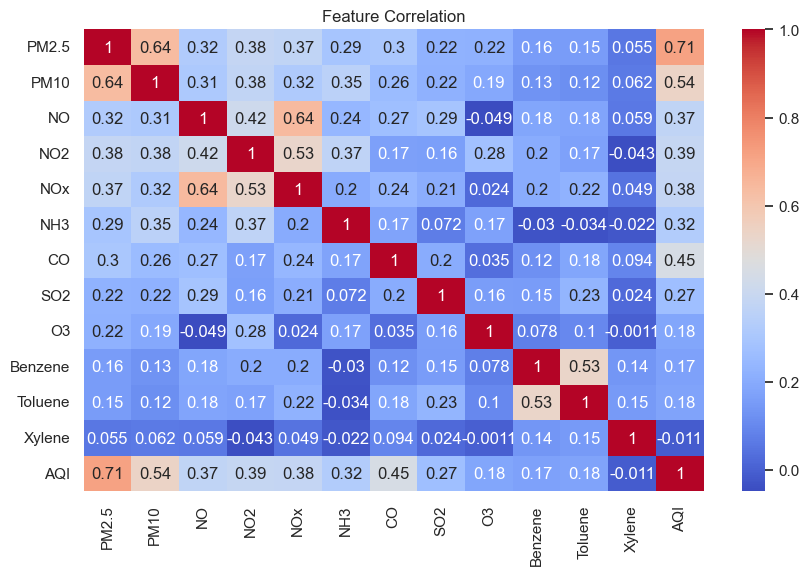

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


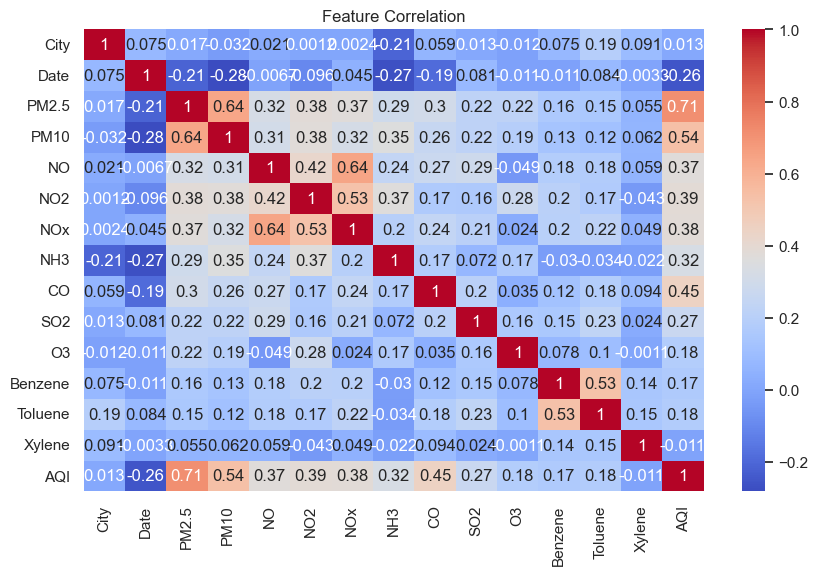

In [48]:
from sklearn.preprocessing import LabelEncoder

# Identify non-numeric columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Now, retry the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


### 📌 3.5 Splitting Data for Model Training

In [49]:
X = df.drop(columns=['AQI'])  # Features
y = df['AQI']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 🚀 3.6 Model Training and Evaluation
#### 🔹 3.6.1 Linear Regression

In [50]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#### 🔹 3.6.2 Random Forest Regressor

In [51]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

### ✅ 3.7 Model Evaluation

In [52]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"📌 {model_name} Performance:")
    print(f"✅ MAE: {mean_absolute_error(y_true, y_pred)}")
    print(f"✅ MSE: {mean_squared_error(y_true, y_pred)}")
    print(f"✅ R2 Score: {r2_score(y_true, y_pred)}")
    print("\n")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

📌 Linear Regression Performance:
✅ MAE: 37.93066231638919
✅ MSE: 2913.716866037121
✅ R2 Score: 0.6131287993234591


📌 Random Forest Performance:
✅ MAE: 20.856575452716296
✅ MSE: 1106.5885294164991
✅ R2 Score: 0.8530717798903682




*Week 3 - Data Modeling - 10th March 2025*

In [53]:
df.drop(['Date', 'City'], axis = 1, inplace=True)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.13,118.454435,6.930000,28.71,33.720,23.848366,1.71,49.52,59.76,0.02,0.00,3.140000,209.0
29,79.84,118.454435,13.850000,28.68,41.080,23.848366,1.71,48.49,42.73,0.04,0.00,4.810000,328.0
30,94.52,118.454435,24.390000,32.66,52.610,23.848366,1.71,23.47,42.73,0.24,0.01,3.588683,208.0
31,72.45,118.454435,17.622421,42.08,36.015,23.848366,1.71,23.47,42.73,0.40,0.04,3.588683,208.0
32,72.45,118.454435,17.622421,35.31,36.015,23.848366,1.71,23.47,42.73,0.46,0.06,3.588683,208.0


In [54]:
# Scaling - Standard Scaler
from sklearn.preprocessing import StandardScaler
df1 = StandardScaler().fit_transform(df)
df1

array([[ 1.08576332,  0.53810861, -0.6369517 , ..., -1.31656901,
         0.16471073,  0.70999757],
       [ 0.96827688,  0.53810861,  0.26764179, ..., -1.31656901,
         1.46160349,  2.07124258],
       [ 1.49250208,  0.53810861,  1.6454475 , ..., -1.3144617 ,
         0.51315009,  0.69855854],
       ...,
       [-1.06470272, -0.99564237, -1.09186288, ..., -1.3144617 ,
        -2.2737583 , -0.90290618],
       [-1.28860545, -1.45409992, -1.01342992, ..., -1.31656901,
        -2.2737583 , -1.06305265],
       [-1.34717011, -0.98778809, -1.49056378, ...,  0.69079517,
         0.51315009, -1.10880878]])

In [55]:
df = pd.DataFrame(df1, columns=df.columns)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,1.085763,0.538109,-0.636952,0.248639,0.522084,0.524554,0.946286,3.823810,1.645893,-1.131031,-1.316569,0.164711,0.709998
1,0.968277,0.538109,0.267642,0.246660,1.010855,0.524554,0.946286,3.717302,0.612931,-1.120192,-1.316569,1.461603,2.071243
2,1.492502,0.538109,1.645447,0.509259,1.776551,0.524554,0.946286,1.130092,0.612931,-1.011800,-1.314462,0.513150,0.698559
3,0.704379,0.538109,0.760779,1.130789,0.674493,0.524554,0.946286,1.130092,0.612931,-0.925086,-1.308140,0.513150,0.698559
4,0.704379,0.538109,0.760779,0.684106,0.674493,0.524554,0.946286,1.130092,0.612931,-0.892568,-1.303925,0.513150,0.698559


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [58]:
# Feature & Target Selection
X = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene']]
y = df['AQI']

In [59]:
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,1.085763,0.538109,-0.636952,0.248639,0.522084,0.524554,0.946286,3.823810,1.645893,-1.131031,-1.316569,0.164711
1,0.968277,0.538109,0.267642,0.246660,1.010855,0.524554,0.946286,3.717302,0.612931,-1.120192,-1.316569,1.461603
2,1.492502,0.538109,1.645447,0.509259,1.776551,0.524554,0.946286,1.130092,0.612931,-1.011800,-1.314462,0.513150
3,0.704379,0.538109,0.760779,1.130789,0.674493,0.524554,0.946286,1.130092,0.612931,-0.925086,-1.308140,0.513150
4,0.704379,0.538109,0.760779,0.684106,0.674493,0.524554,0.946286,1.130092,0.612931,-0.892568,-1.303925,0.513150


In [60]:
# Split the data into training and testing data - Training set - 80% | Testing set - 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shape of X Train',X_train.shape)
print('Shape of X Test',X_test.shape)
print('Shape of y Train',y_train.shape)
print('Shape of y Test',y_test.shape)

Shape of X Train (19880, 12)
Shape of X Test (4970, 12)
Shape of y Train (19880,)
Shape of y Test (4970,)


In [61]:
# Linear Regression Model
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [62]:
# Predicting the values:
train_pred = LR.predict(X_train) # Predicting train
test_pred = LR.predict(X_test) # Predicting test

In [63]:
# Evaluation for Linear Regression
RMSE_train = (np.sqrt(mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pred)))
print('RMSE Train Data = ', str(RMSE_train))
print('RMSE Test Data = ', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train = ', LR.score(X_train, y_train))
print('R Squared value on Test = ', LR.score(X_test, y_test))

RMSE Train Data =  0.631401301193942
RMSE Test Data =  0.621974113191972
____________________________________________________________
R Squared value for Train =  0.6027635365028877
R Squared value on Test =  0.6074590268277771


In [64]:
# KNN
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [65]:
# Predicting the values:
train_pred = knn.predict(X_train) # Predicting train
test_pred = knn.predict(X_test) # Predicting test

# Evaluation for KNN
RMSE_train = (np.sqrt(mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pred)))
print('RMSE Train Data = ', str(RMSE_train))
print('RMSE Test Data = ', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train = ', knn.score(X_train, y_train))
print('R Squared value on Test = ', knn.score(X_test, y_test))

RMSE Train Data =  0.39882217023840516
RMSE Test Data =  0.4978742365376903
____________________________________________________________
R Squared value for Train =  0.8415118680412235
R Squared value on Test =  0.7484758542931029


In [66]:
# Decision Tree
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [67]:
# Predicting the values:
train_pred = dtr.predict(X_train) # Predicting train
test_pred = dtr.predict(X_test) # Predicting test

# Evaluation for Decision Tree Regressor
RMSE_train = (np.sqrt(mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pred)))
print('RMSE Train Data = ', str(RMSE_train))
print('RMSE Test Data = ', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train = ', dtr.score(X_train, y_train))
print('R Squared value on Test = ', dtr.score(X_test, y_test))

RMSE Train Data =  0.02594854601836432
RMSE Test Data =  0.5498318717493128
____________________________________________________________
R Squared value for Train =  0.9993290900734868
R Squared value on Test =  0.693238963077105


In [68]:
# Random Forest Regressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [69]:
# Predicting the values:
train_pred = rfr.predict(X_train) # Predicting train
test_pred = rfr.predict(X_test) # Predicting test

# Evaluation for Randome Forest Regressor
RMSE_train = (np.sqrt(mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pred)))
print('RMSE Train Data = ', str(RMSE_train))
print('RMSE Test Data = ', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train = ', rfr.score(X_train, y_train))
print('R Squared value on Test = ', rfr.score(X_test, y_test))

RMSE Train Data =  0.15056855987351397
RMSE Test Data =  0.3972387910461127
____________________________________________________________
R Squared value for Train =  0.9774104928959262
R Squared value on Test =  0.8398807015211587


In [71]:
import joblib  

# Save the best-performing model
joblib.dump(rfr, "aqi_prediction_model.pkl")  
print("Model saved successfully! ✅")


Model saved successfully! ✅


### 🎯 3.8 Conclusion
Based on the results, the model with the highest accuracy and lowest error will be considered the best choice for AQI prediction.


# 📌 Contributions & Feedback are Welcome!

***📩 Feel free to reach out if you have any suggestions or improvements. 🚀***